<div style="padding: 20px; border-radius: 10px; border: 2px solid #3A506B; background-color: #F1F6F9; color: #1C2541;">
    <h1 style="font-family: Arial, sans-serif; color: #3A506B; font-size: 2.5em; text-align: center; line-height: 1.2;">
        <span style="font-weight: bold;">Intro to Deep Learning</span>
    </h1>
    <h2 style="font-family: Arial, sans-serif; color: #1C2541; text-align: center; font-size: 1.5em; font-weight: normal;">
        2024-2025
    </h2>
    <h2 style="font-family: Arial, sans-serif; color: #1C2541; text-align: center; font-size: 1.5em; font-weight: normal;">
        Course ID: 05714182
    </h2>
    <h2 style="font-family: Arial, sans-serif; color: #1C2541; text-align: center; font-size: 1.5em; font-weight: normal;">
        ----------------------------------
    </h2>
    <h2 style="font-family: Arial, sans-serif; color: #1C2541; text-align: center; font-size: 1.5em; font-weight: normal;">
        Yahlly Schein
    </h2>
</div>


<div style="padding: 20px; border-radius: 10px; border: 2px solid #3A506B; background-color: #FF8C00; color: #1C2541;">
    <h2 style="font-family: Arial, sans-serif; color: #1C2541; text-align: center; font-size: 1.5em; font-weight: normal;">
        HW 1
    </h2>
</div>

# Classification and Regression with a Neural Network in Pytorch

Welcome to your first programming assignment! 
In this assignment you will build your first classification and regression neural networks.
This assignment is a 'step-through' guide to implement a simple fully-connected neural network in Pytorch.

* In the first part of this exercise, you will implement a neural network with a 2 dimensional input. Your dataset is based on a two circles-shaped groups for classification.

* Then, in the second part of this exercise, you will implement a regression model for predicting the output of a two dimensional function.

# Packages
Let's first import all the packages that you will need during this part of assignment.

## Feel free to use another libraries if you want to.

In [1]:
import numpy as np
from sklearn.datasets import make_moons, make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, auc
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import torch
from torch import nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
import optuna
from torch.utils.data import random_split

C:\Users\yuval\AppData\Roaming\Python\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Dataset

In [2]:
random_num = 0
np.random.seed(random_num)
torch.manual_seed(random_num)
x, y = make_circles(500, noise=0.075)
x_train_validation, x_test, y_train_validation, y_test = train_test_split(x, y, test_size=0.3, random_state=random_num)
x_train, x_val, y_train, y_val = train_test_split(x_train_validation, y_train_validation, test_size=0.25, random_state=random_num)

# Visualize the dataset using matplotlib:

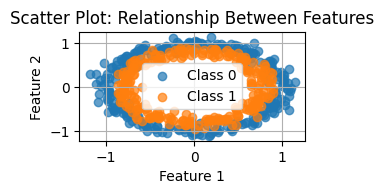

In [3]:
plt.subplot(3, 2, 1)
plt.scatter(x[y == 0, 0], x[y == 0, 1], label="Class 0", alpha=0.7)
plt.scatter(x[y == 1, 0], x[y == 1, 1], label="Class 1", alpha=0.7)
plt.title("Scatter Plot: Relationship Between Features")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)

C:\Users\yuval\AppData\Local\Temp\ipykernel_32732\3146033295.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([x[:, 0], x[:, 1]], labels=["Feature 1", "Feature 2"])


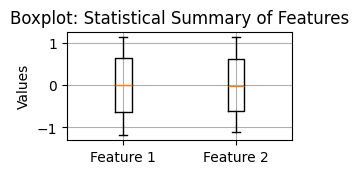

In [4]:
plt.subplot(3, 2, 3)
plt.boxplot([x[:, 0], x[:, 1]], labels=["Feature 1", "Feature 2"])
plt.title("Boxplot: Statistical Summary of Features")
plt.ylabel("Values")
plt.grid(True)

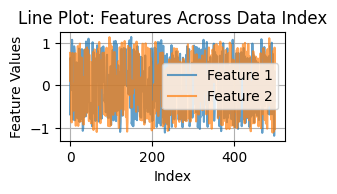

In [5]:
plt.subplot(3, 2, 4)
plt.plot(range(len(x)), x[:, 0], label="Feature 1", alpha=0.7)
plt.plot(range(len(x)), x[:, 1], label="Feature 2", alpha=0.7)
plt.title("Line Plot: Features Across Data Index")
plt.xlabel("Index")
plt.ylabel("Feature Values")
plt.legend()
plt.grid(True)

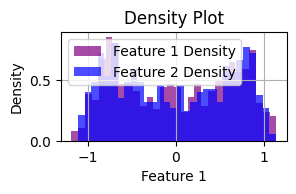

In [6]:
plt.subplot(3, 2, 5)
plt.hist(x[:, 0], bins=30, density=True, alpha=0.7, color="purple", label="Feature 1 Density")
plt.title("Density Plot")
plt.xlabel("Feature 1")
plt.ylabel("Density")
plt.legend()
plt.grid(True)

plt.subplot(3, 2, 5)
plt.hist(x[:, 1], bins=30, density=True, alpha=0.7, color="blue", label="Feature 2 Density")
plt.xlabel("Feature 1")
plt.ylabel("Density")
plt.legend()
plt.grid(True)

### Conclusion from Graphs

The provided visualizations offer a comprehensive summary of the dataset's characteristics and distribution:

1. **Scatter Plot**: The scatter plot illustrates the relationship between the two features for Class 0 and Class 1. The circular pattern observed reflects the underlying structure and separability of the dataset.

2. **Boxplot**: The boxplot provides a statistical summary of Feature 1 and Feature 2, highlighting their medians, interquartile ranges, and potential outliers. Both features are symmetrically distributed around a median close to zero and exhibit similar ranges.

3. **Line Plot**: The line plot showcases variations in Feature 1 and Feature 2 across the data index. Both features show consistent fluctuations without significant trends, suggesting stability in the dataset.

4. **Density Plot**: The density plot displays the distribution of Feature 1 and Feature 2. Both features have a roughly uniform density with peaks near zero, indicating a shared symmetrical distribution.

In summary, the dataset exhibits a circular structure, symmetrical feature distributions, and consistent patterns across indices, making it suitable for classification or clustering tasks.


# Simple Logistic Regression

1. Implement a 2-class classification neural network with a zero hidden layer.
2. Plot loss vs epoch.
3. Plot AUC vs epoch for train and test sets. 
4. Plot ROC curve and calculate AUC for the test set.
5. Plot the learned decision boundary.
6. Briefly interpret graph's results.   

How you will do it:

* Prepare the Data.
* Define the Model.
* Train the Model.
* Evaluate the Model.
* Visualization.

In [7]:
# Convert data to PyTorch tensors
x_train_tensor = torch.tensor(x_train_validation, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_validation, dtype=torch.float32).view(-1, 1)

x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Create TensorDatasets
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)

# data loader
# Training
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Testing
test_loader = DataLoader(test_dataset, batch_size=min(len(test_dataset), 256), shuffle=False)

**Define the Model:**

In [8]:
class FirstNet(nn.Module):
    def __init__(self):
        super(FirstNet, self).__init__()
        # Define layers
        self.layer1 = nn.Linear(in_features=2, out_features=1)  
    
    def forward(self, x):
        return torch.sigmoid(self.layer1(x)) 
    
# Initialize model, loss function, and optimizer
model = FirstNet()
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

**Training and validation:**

In [9]:
# Train the model
num_epochs = 100
training_losses = []
training_auc_scores = []

# Initialize lists to store test metrics
test_losses = []
test_auc_scores = []

for epoch in range(num_epochs):
    # Training phase
    model.train()
    epoch_train_loss = 0
    true_train_labels = []
    predicted_train_labels = []

    for batch_features, batch_labels in train_loader:
        optimizer.zero_grad()
        predictions = model(batch_features)
        loss = criterion(predictions, batch_labels)
        loss.backward()
        optimizer.step()
        
        epoch_train_loss += loss.item() * batch_features.size(0)
        true_train_labels.append(batch_labels.numpy())
        predicted_train_labels.append(predictions.detach().numpy().squeeze())

    # Calculate training loss and AUC
    training_losses.append(epoch_train_loss / len(train_loader.dataset))
    training_auc_scores.append(
        roc_auc_score(np.concatenate(true_train_labels), np.concatenate(predicted_train_labels))
    )

    # Testing phase
    model.eval()
    epoch_test_loss = 0
    true_test_labels = []
    predicted_test_labels = []

    with torch.no_grad():
        for batch_features, batch_labels in test_loader:
            predictions = model(batch_features)
            loss = criterion(predictions, batch_labels)
            epoch_test_loss += loss.item() * batch_features.size(0)
            true_test_labels.append(batch_labels.numpy())
            predicted_test_labels.append(predictions.numpy().squeeze())

    # Calculate test loss and AUC
    test_losses.append(epoch_test_loss / len(test_loader.dataset))
    test_auc_scores.append(
        roc_auc_score(np.concatenate(true_test_labels), np.concatenate(predicted_test_labels))
    )

    # Log progress every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}]")
        print(f"Training Loss: {training_losses[-1]:.4f}, Training AUC: {training_auc_scores[-1]:.4f}")
        print(f"Test Loss: {test_losses[-1]:.4f}, Test AUC: {test_auc_scores[-1]:.4f}")


Epoch [10/100]
Training Loss: 0.6930, Training AUC: 0.5018
Test Loss: 0.7051, Test AUC: 0.4944
Epoch [20/100]
Training Loss: 0.6926, Training AUC: 0.5036
Test Loss: 0.7026, Test AUC: 0.4977
Epoch [30/100]
Training Loss: 0.6921, Training AUC: 0.5013
Test Loss: 0.7018, Test AUC: 0.5047
Epoch [40/100]
Training Loss: 0.6922, Training AUC: 0.4944
Test Loss: 0.7020, Test AUC: 0.5056
Epoch [50/100]
Training Loss: 0.6921, Training AUC: 0.4986
Test Loss: 0.7021, Test AUC: 0.5056
Epoch [60/100]
Training Loss: 0.6919, Training AUC: 0.4982
Test Loss: 0.7014, Test AUC: 0.5056
Epoch [70/100]
Training Loss: 0.6920, Training AUC: 0.4971
Test Loss: 0.7016, Test AUC: 0.5060
Epoch [80/100]
Training Loss: 0.6921, Training AUC: 0.4959
Test Loss: 0.7014, Test AUC: 0.5076
Epoch [90/100]
Training Loss: 0.6920, Training AUC: 0.5025
Test Loss: 0.7017, Test AUC: 0.5056
Epoch [100/100]
Training Loss: 0.6920, Training AUC: 0.5017
Test Loss: 0.7022, Test AUC: 0.5051


**Visualizing the plots**:

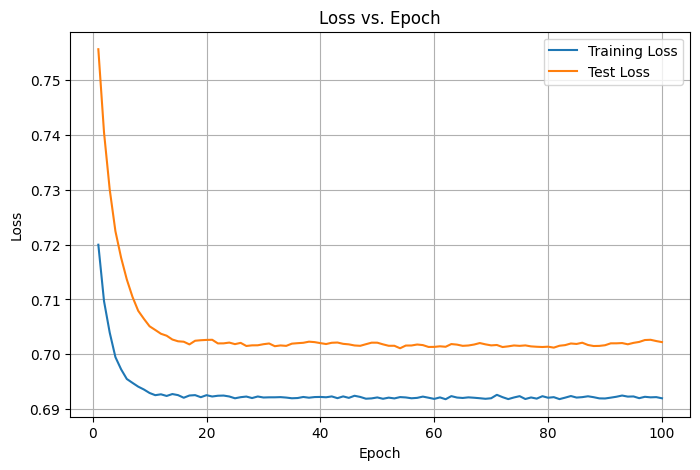

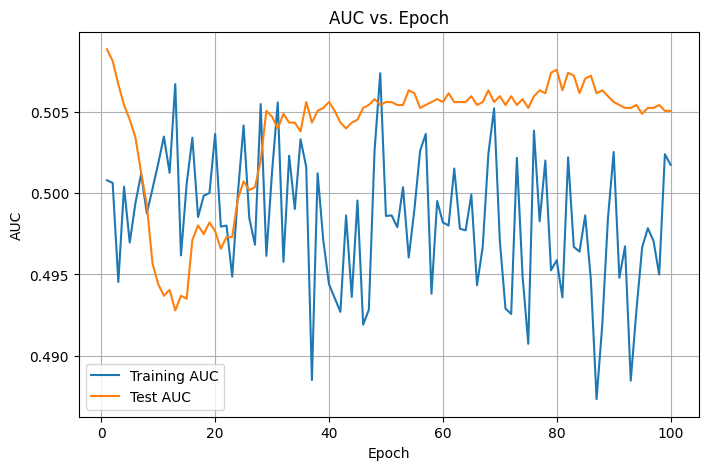

In [10]:
# Plot Loss vs. Epoch
plt.figure(figsize=(8, 5))
plt.plot(range(1, num_epochs + 1), training_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()
plt.grid(True)
plt.show()

# Plot AUC vs. Epoch
plt.figure(figsize=(8, 5))
plt.plot(range(1, num_epochs + 1), training_auc_scores, label='Training AUC')
plt.plot(range(1, num_epochs + 1), test_auc_scores, label='Test AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.title('AUC vs. Epoch')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\yuval\AppData\Local\Temp\ipykernel_32732\3143109628.py:12: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, edgecolor='k', cmap='bwr', marker='x', label='Test Points', alpha=0.7)


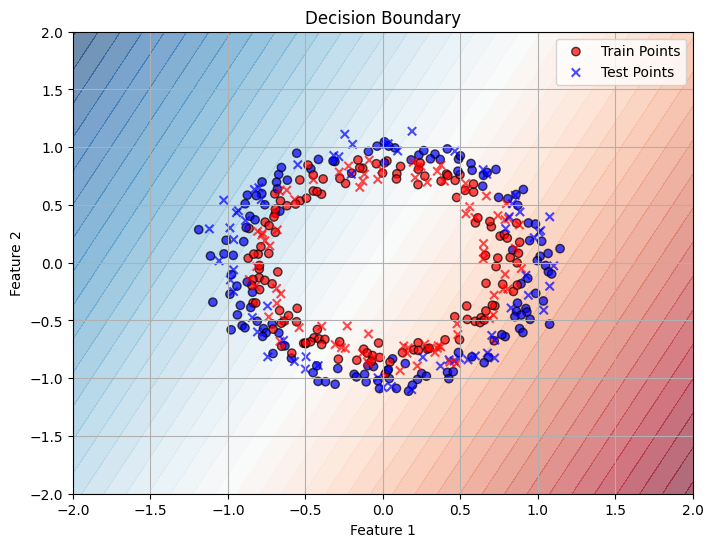

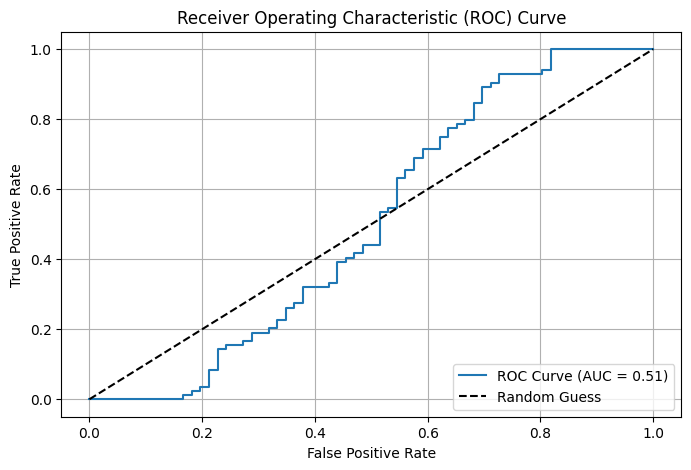

In [11]:
# Create a mesh grid for the decision boundary
xx, yy = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Predict for each point in the grid
with torch.no_grad():
    grid_preds = model(torch.tensor(grid_points, dtype=torch.float32)).numpy().reshape(xx.shape)
# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, grid_preds, levels=50, cmap='RdBu', alpha=0.6)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, edgecolor='k', cmap='bwr', label='Train Points', alpha=0.7)
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, edgecolor='k', cmap='bwr', marker='x', label='Test Points', alpha=0.7)
plt.title('Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

# Compute ROC curve and AUC for the test set
y_test_pred_probs = model(torch.tensor(x_test, dtype=torch.float32)).detach().numpy()
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

The single-layer linear network struggles to model the non-linear decision boundary required to separate the circular classes in the dataset effectively. While the training and test loss decrease and stabilize around 0.69 and 0.70, respectively, the test AUC remains slightly above 0.5, indicating performance close to random guessing. The decision boundary plot shows the model's inability to capture the circular structure of the data, which reflects in the ROC curve with an AUC of approximately 0.51. This underperformance highlights the limitations of the simple network architecture. To improve, introducing non-linearity with hidden layers, experimenting with activation functions, or adopting more complex models like multi-layer perceptrons (MLPs) would be necessary to handle the data's non-linear patterns effectively.

7. Is the decision boundary linear or nonlinear in the case of a logistic regression? Explain.

The decision boundary in logistic regression is linear because logistic regression is essentially a linear model. It computes a weighted sum of the input features and applies the sigmoid function to predict probabilities. As a result, the decision boundary is a straight line (or a hyperplane in higher dimensions) that separates the classes. Non-linear decision boundaries require additional feature transformations or the use of more complex models, such as kernel-based methods or neural networks.

# Classification with Neural Networks

After you implemented "classical" logistic regression, now you will be implementing a neural network with one or more hidden layers.
You will need to choose the number of hidden layers and nodes in a feedforward neural network, activation function, the type of optimizer and its hyperparmeters which will give you the best result. Remember, we don't want to overfit the training data, we want to generalize the solution for new data not seen during training. 

Plot the same graphs as in the previous sections and explain the similarities and differences. 

In [12]:
# Convert training data to PyTorch tensors
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)  # Reshape for BCEWithLogitsLoss

# Convert validation data to PyTorch tensors
x_val_tensor = torch.tensor(x_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).view(-1, 1)

# Convert test data to PyTorch tensors
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Create PyTorch datasets
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
val_dataset = TensorDataset(x_val_tensor, y_val_tensor)
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)

# Create PyTorch DataLoaders
batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)  # Shuffle for training
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)    # No shuffle for validation
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)  # No shuffle for testing


**Define the Model:**

In [13]:
class SecondNet(nn.Module):
    def __init__(self, input_features, hidden_layer_size, output_features, num_hidden_layers, activation_function=nn.ReLU(), dropout_rate=0.25):
        super(SecondNet, self).__init__()
        self.network_layers = nn.ModuleList()
        self.network_layers.append(nn.Linear(input_features, hidden_layer_size))
        self.network_layers.append(activation_function)
        self.network_layers.append(nn.Dropout(dropout_rate))

        for _ in range(num_hidden_layers):
            self.network_layers.append(nn.Linear(hidden_layer_size, hidden_layer_size))
            self.network_layers.append(activation_function)
            self.network_layers.append(nn.Dropout(dropout_rate))

        self.final_output_layer = nn.Linear(hidden_layer_size, output_features)

    def forward(self, x):
        for layer in self.network_layers:
            x = layer(x)
        return self.final_output_layer(x)


**Training and validation:**

In [14]:
# Define the Optuna objective function
def objective(trial):
    # Hyperparameters to optimize
    num_hidden_layers = trial.suggest_int('num_hidden_layers', 1, 3)
    hidden_layer_size = trial.suggest_int('hidden_layer_size', 32, 128)
    dropout_rate = trial.suggest_float('dropout_rate', 0.2, 0.6)
    learning_rate = trial.suggest_float('learning_rate', 0.001, 0.1)
    activation_function = nn.ReLU() if trial.suggest_categorical('activation_function', ['relu', 'tanh']) == 'relu' else nn.Tanh()

    # Model initialization
    model = SecondNet(
        input_features=2,
        hidden_layer_size=hidden_layer_size,
        output_features=1,
        num_hidden_layers=num_hidden_layers,
        activation_function=activation_function,
        dropout_rate=dropout_rate
    ).to(device)

    # Loss and optimizer
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    best_val_auc = 0
    for epoch in range(50):  # Number of epochs for each trial
        # Training phase
        model.train()
        for x_batch, y_batch in train_loader:
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            y_pred = model(x_batch)
            loss = criterion(y_pred, y_batch)
            loss.backward()
            optimizer.step()

        # Validation phase
        model.eval()
        all_preds = []
        all_labels = []
        with torch.no_grad():
            for x_batch, y_batch in val_loader:
                x_batch, y_batch = x_batch.to(device), y_batch.to(device)
                y_pred = model(x_batch)
                all_preds.extend(torch.sigmoid(y_pred).cpu().numpy())
                all_labels.extend(y_batch.cpu().numpy())

        fpr, tpr, _ = roc_curve(all_labels, all_preds)
        val_auc = auc(fpr, tpr)

        if val_auc > best_val_auc:
            best_val_auc = val_auc

        trial.report(val_auc, step=epoch)
        if trial.should_prune():
            raise optuna.exceptions.TrialPruned()

    return best_val_auc


# Run Optuna optimization
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Retrieve best trial
best_trial = study.best_trial
print("Best trial parameters:", best_trial.params)
print("Best validation AUC:", best_trial.value)

[I 2024-11-27 17:43:51,877] A new study created in memory with name: no-name-2d8e0302-fe7a-47b4-885f-eba105a1ac9b
[I 2024-11-27 17:43:52,461] Trial 0 finished with value: 0.8810526315789473 and parameters: {'num_hidden_layers': 2, 'hidden_layer_size': 120, 'dropout_rate': 0.20308215577992225, 'learning_rate': 0.017986261115721127, 'activation_function': 'tanh'}. Best is trial 0 with value: 0.8810526315789473.
[I 2024-11-27 17:43:52,981] Trial 1 finished with value: 0.7052631578947368 and parameters: {'num_hidden_layers': 2, 'hidden_layer_size': 115, 'dropout_rate': 0.25161654167173125, 'learning_rate': 0.048980158605947836, 'activation_function': 'tanh'}. Best is trial 0 with value: 0.8810526315789473.
[I 2024-11-27 17:43:53,360] Trial 2 finished with value: 0.7721052631578947 and parameters: {'num_hidden_layers': 1, 'hidden_layer_size': 38, 'dropout_rate': 0.25590233564180787, 'learning_rate': 0.04105118374748821, 'activation_function': 'tanh'}. Best is trial 0 with value: 0.881052631

Best trial parameters: {'num_hidden_layers': 3, 'hidden_layer_size': 95, 'dropout_rate': 0.45583165101865103, 'learning_rate': 0.011812042573486201, 'activation_function': 'relu'}
Best validation AUC: 0.9936842105263158


In [15]:
# Train final model using best parameters
best_model = SecondNet(
    input_features=2,  # Updated
    hidden_layer_size=best_trial.params['hidden_layer_size'],  # Updated
    output_features=1,  # Updated
    num_hidden_layers=best_trial.params['num_hidden_layers'],  # Updated
    activation_function=nn.ReLU() if best_trial.params['activation_function'] == 'relu' else nn.Tanh(),  # Updated
    dropout_rate=best_trial.params['dropout_rate']  # Updated
).to(device)

criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(best_model.parameters(), lr=best_trial.params['learning_rate'])

In [16]:
# Train the best model
train_loss = []
train_auc = []
val_loss = []
val_auc = []

for epoch in range(100):
    # Training phase
    best_model.train()
    running_loss = 0.0
    all_preds = []
    all_labels = []
    for x_batch, y_batch in train_loader:
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        y_pred = best_model(x_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * x_batch.size(0)
        all_preds.extend(torch.sigmoid(y_pred).cpu().detach().numpy())
        all_labels.extend(y_batch.cpu().numpy())

    train_loss.append(running_loss / len(train_loader.dataset))
    train_auc.append(auc(*roc_curve(all_labels, all_preds)[:2]))

    # Validation phase
    best_model.eval()
    running_loss = 0.0
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for x_batch, y_batch in val_loader:
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)
            y_pred = best_model(x_batch)
            loss = criterion(y_pred, y_batch)
            running_loss += loss.item() * x_batch.size(0)
            all_preds.extend(torch.sigmoid(y_pred).cpu().numpy())
            all_labels.extend(y_batch.cpu().numpy())

    val_loss.append(running_loss / len(val_loader.dataset))
    val_auc.append(auc(*roc_curve(all_labels, all_preds)[:2]))

**Visualizing the plots:**

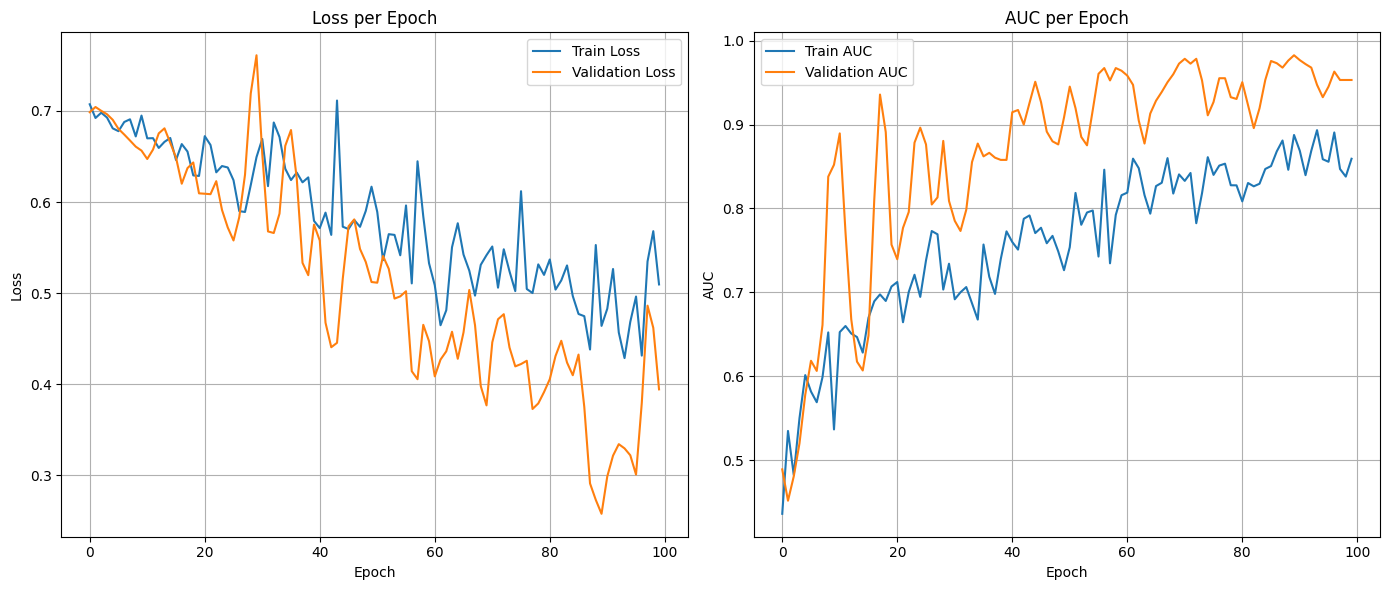

In [17]:
# First Figure: Loss and AUC Curves
fig1, axs1 = plt.subplots(1, 2, figsize=(14, 6))

# Loss curves
axs1[0].plot(train_loss, label='Train Loss')
axs1[0].plot(val_loss, label='Validation Loss')
axs1[0].set_title('Loss per Epoch')
axs1[0].set_xlabel('Epoch')
axs1[0].set_ylabel('Loss')
axs1[0].legend()
axs1[0].grid(True)

# AUC curves
axs1[1].plot(train_auc, label='Train AUC')
axs1[1].plot(val_auc, label='Validation AUC')
axs1[1].set_title('AUC per Epoch')
axs1[1].set_xlabel('Epoch')
axs1[1].set_ylabel('AUC')
axs1[1].legend()
axs1[1].grid(True)

plt.tight_layout()
plt.show()

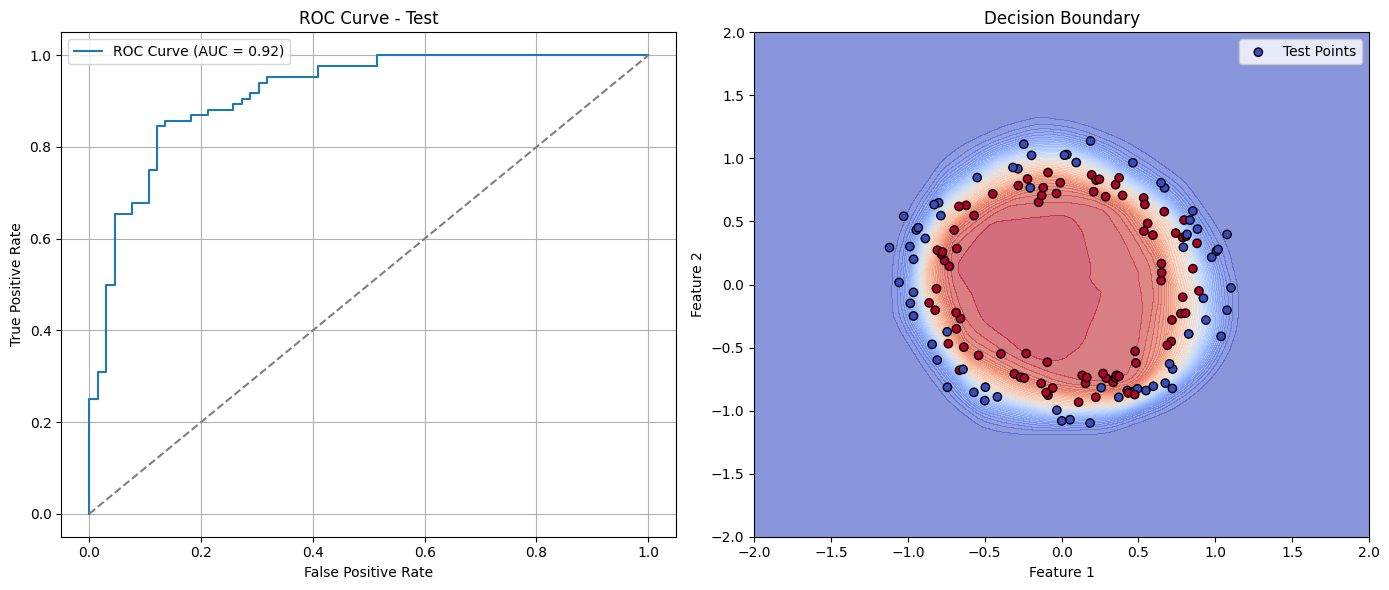

In [18]:
# Second Figure: ROC Curve and Decision Boundary
fig2, axs2 = plt.subplots(1, 2, figsize=(14, 6))

# Calculate predictions and labels for the ROC curve
y_test_all = []
y_test_preds = []
with torch.no_grad():
    for x_batch, y_batch in test_loader:
        x_batch, y_batch = x_batch.to(device), y_batch.to(device)
        y_pred = torch.sigmoid(best_model(x_batch))  # Apply sigmoid to logits
        y_test_all.extend(y_batch.cpu().numpy())
        y_test_preds.extend(y_pred.cpu().numpy())

# ROC curve for the test set
fpr, tpr, _ = roc_curve(np.array(y_test_all).ravel(), np.array(y_test_preds).ravel())
axs2[0].plot(fpr, tpr, label=f'ROC Curve (AUC = {auc(fpr, tpr):.2f})')
axs2[0].plot([0, 1], [0, 1], linestyle='--', color='gray')
axs2[0].set_title('ROC Curve - Test')
axs2[0].set_xlabel('False Positive Rate')
axs2[0].set_ylabel('True Positive Rate')
axs2[0].legend()
axs2[0].grid(True)

# Decision boundary
xx, yy = np.meshgrid(np.linspace(-2, 2, 100), np.linspace(-2, 2, 100))
grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_tensor = torch.tensor(grid_points, dtype=torch.float32).to(device)

with torch.no_grad():
    grid_preds = torch.sigmoid(best_model(grid_tensor)).cpu().numpy().reshape(xx.shape)

axs2[1].contourf(xx, yy, grid_preds, levels=50, cmap='coolwarm', alpha=0.6)
axs2[1].scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap='coolwarm', edgecolor='k', marker='o', label='Test Points')
axs2[1].set_title('Decision Boundary')
axs2[1].set_xlabel('Feature 1')
axs2[1].set_ylabel('Feature 2')
axs2[1].legend()

plt.tight_layout()
plt.show()


8. Why does a neural network need a non-linear activation function? try to figure out what heppan when you remove the activation function and explain the results.

# Regression with Neural Networks

In this part of the excercise you will need to implement a regression model using neural networks. The model should predict the output of a trigonometric function of two variables. Your data set is based on a meshgrid. Your task is to create a list of points that would correspond to a grid and use it for the input of your neural network. Then, build your neural networks and find the architecture which gives you the best results.
1. Plot the surface from the overall data and compare it to your predicted test sets.
2. Which loss function and validation metric did you choose?
3. Plot the loss and validation metrics vs epoch for the training and test sets.
4. Build a new neural network and try overfitting your training set. Show the overfitting by using learning curve plots. 
    **Note**: You can use plt.ylim() function to better focus on the changes in the trends.

# Packages 

First import all the packages that you will need during this part of assignment.

## Feel free to use another libraries if you want to.

In [19]:
import numpy as np
import torch
from torch.autograd import Variable
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from matplotlib import cm

**Generate data:**

In [20]:
np.random.seed(random_num)
x = np.linspace(-5, 5, 30)
y = np.linspace(-5, 5, 30)
xx, yy = np.meshgrid(x, y)
z = np.sin(xx) * np.cos(yy) + 0.1 * np.random.rand(xx.shape[0], xx.shape[1])

**Define the Model:**

In [21]:
### START CODE HERE ###


**Training and validation:**

In [22]:
### START CODE HERE ###


**Visualizing the plots:**

In [23]:
### START CODE HERE ###


### Build a new neural network and try overfitting your training set

**Generate data:**

In [24]:
np.random.seed(random_num)
x = np.linspace(-5, 5, 30)
y = np.linspace(-5, 5, 30)
xx, yy = np.meshgrid(x, y)
z = np.sin(xx) * np.cos(yy) + 0.1 * np.random.rand(xx.shape[0], xx.shape[1])

**Define the Model:**

In [25]:
### START CODE HERE ###


**Training and validation:**

In [26]:
### START CODE HERE ###


**Visualizing the plots:**

In [27]:
### START CODE HERE ###


5. Briefly explain graph's results.

In [28]:
## Answer here ##

6. How does your metric value differs between the training data and the test data and why?


In [29]:
## Answer here ##

7. Mention 5 concepts/function/blocks of code from exercises 1 or 2 that you used while solving the assignment.

In [30]:
## Answer here ##

8. Mention 3 things that a LLM (GPT, Claude...) helped you with:

In [31]:
## Answer here ##

9. Describe the biggest challenge you faced while working on this assignment.

In [32]:
## Answer here ##